# Введение в искусственные нейронные сети
# Урок 3. Keras

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Что такое Keras</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
</ol>

## Способы создания нейросетей

Нейросети это математические модели. Программирую на любом языке можно решать задачи связанные с математикой. Однако встает вопрос какой язык подойдет для этого больше? Не считая учебных нейросетей, нейросети как правило работают с большим количеством данных. Поэтому, чтобы обучение нейросетей происходило с приемлимой скоростью нужно использовать быстрый язык. Например Си. Но так как язык Си это язык с низким уровнем абстракции то программировать и модифицировать на нем нейросети было бы крайне затруднительно. 

Хорошо может подойти для этих целей язык Python. Так как он с одной стороны имеет высокий уровень абстракции с другой стороны операции с массивами данных могут сделать его библиотеки написанные на Си. Таким способом мы пользовались на первых 2 уроках. Однако если писать нейросети таким образом то будет много повторяющегося кода поскольку архитектуры нейросетей остаются одинаковыми и зачастую у них только меняются параметры. Кроме этого нам может понадобиться хорошо знать архитектуры самых разных нейронных сетей чтобы реализовать их вручную. Работа таким образом затруднительна для людей не имеющих достаточной подготовки, а для имеющих может быть нааборот рутиной.

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Упрощение создания нейронных сетей не заканчивается на этих фрейворках. Существуют инструменты которые позволяют создавать нейронные сети без навыков программирования, строя нейросети графически. Примеры: Neural Designer, Deep Learning Studio.

Но и на этом не заканчиваются способы создания нейросетей. Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras

Как вы возможно заметили что все эти инструменты отранжированы походы изложения в порядке возрастания уровня абстракции. Соответсвенно говоря о плюсах минусах того или иного инструмента мы должны понимать в принципе плюсы минусы повышения уровня абстракции. Чем он выше тем меньше производительность и тем меньше его гибкость и набоорот.

Как уже было сказано наиболее востребованных в рабочих целях является тот уровень абстракции, который дают фреймворки. Будем изучать дальше и пользовать ими. Остается сделать выбор среди них. Самый популярный фреймворк для создания нейросетей TensorFlow. Самый популярный для обучения - Keras. На этом уроке мы изучим с вами Keras, а на следующим TensorFlow. Также стоит отметить, что эти фреймворки взаимосвязаны - Keras как правило работает поверх TensorFlow, а сам TensorFlow позволяет пользовать средствами Keras при необходимости.


## Что такое Keras

Keras появился относительно недавно - в 2015 г. Но за это время стал одним из самых популярных фреймоворков для создания нейросетей и фактически стандартом для использования его начинающими.

В чем причина его популярности? Keras позволяет создовать на высоком уровне абстракции. Т.е. на не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Мы можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В тоже время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения.

В техническом плане Keras это оболочка над инструментами меньшей степени абстракции. На выбор он может работать поверх TensorFlow, Microsoft Cognitive Toolkit, R, Theano, PlaidML.

Keras пользуется также на соревнованиях Kaggle.

Однако стоит отметить, что в реальных проектах чаще используется TensorFlow, который мы будем изучать в след. уроках.

Keras как и любой высокобастрактный инструмент имеет изъяны в качестве меньшей гибкостью и производительснотью чем тот же tensorflow.

Стоит также отметить, что Google официально поддерживает Keras, его автор François Chollet, является сотрудником Google. TensorFlow сам в свою очередь позволяет использовать возможности Keras, т.е. в нем заложена возможность переходить на более высокой уровень абстракции.

В данном уроке мы с вами рассмотрим пример обучения нейронной сети с помощью Keras. Но прежде давайте посмотрим на основы синтаксиса Keras и стандартные задачи, которые нужно выполнить при обучении нейронной сети.

## Основы синтаксиса

**Установка и работа с данными**

Для начала необходимо установить keras. Надо полагать вы хорошо знакомы с командой pip.

sudo python3 pip install keras

Давайте попробуем получить датасет mnist и проанализировать его содержимое.
Это еще не будет синтаксис Keras, но это часто встречающаяся задача. Не обращайте внимание на предупреждения от TensorFlow. Их часто бывает много и их можно подавить при необходимости.

    import numpy as np
    import mnist
    import keras

    # The first time you run this might be a bit slow, since the
    # mnist package has to download and cache the data.
    train_images = mnist.train_images()
    train_labels = mnist.train_labels()

    print(train_images.shape) # (60000, 28, 28)
    print(train_labels.shape) # (60000,)

Что в данном случае мы смогли с вами узнать? Что тренировочный датасет mnist состоит из 60000 изображений 28 на 28 пикселей. Такие небольшие датасеты с маленькими изображениями встретятся вам и в других учебных датасетах.

Что нам нужно делать теперь? Если скаченный нами датасет не имеет разделения на тренировочный и тестовый то поделить их. В нашем случае наш тренировочный датасет состоит из 60 000 изображений и тестовый из 10 000 и они поделены по умолчанию.

Нам теперь нужно конверитировать значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5.



In [ ]:
import numpy as np
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

ModuleNotFoundError: No module named 'mnist'

**Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети - 

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках.

Dense - позволяет каждому нейронну быть связанному с другим нейронном. В противовес этом может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

    
    # создание keras модели
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

loss - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети.

optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

metrics - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.
    
    

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения. Ниже типичный пример кода для этого.


    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем команды из этого примера.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даныхх содержащих, например фотографию в виде массива чисел.    
    

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras, для этого. Безусловно здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [ ]:
# The full neural network code!
###############################
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

## Практическое задание

<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

## Дополнительные материалы

<ol>
    <li>https://keras.io/</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>

Домашнее задание к уроку №2 по курсу "Введение в нейронные сети"

In [3]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import itertools

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
pip install itables

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install tensorflow

  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Скачаем набор данных

In [13]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


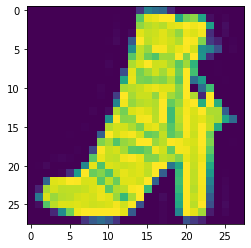

In [14]:
# plt.gray()
plt.imshow(train_imagef[11,:,:])
plt.show()

Проверим количество классов:

In [15]:
pd.Series(train_labelf).nunique()

10

Проверим диапазон цветовых значений картинок:

In [16]:
train_imagef.shape

(60000, 28, 28)

In [17]:
train_imagef.min()

0

In [18]:
train_imagef.max()

255

Отмасштабируем изображения

In [19]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


Исследуем работу 2-х слойной сети в зависимости от количества нейронов во внутреннем слое. Количество нейронов будем брать - степени двойки. Проверять эффективность работы будем на метрике accuracy

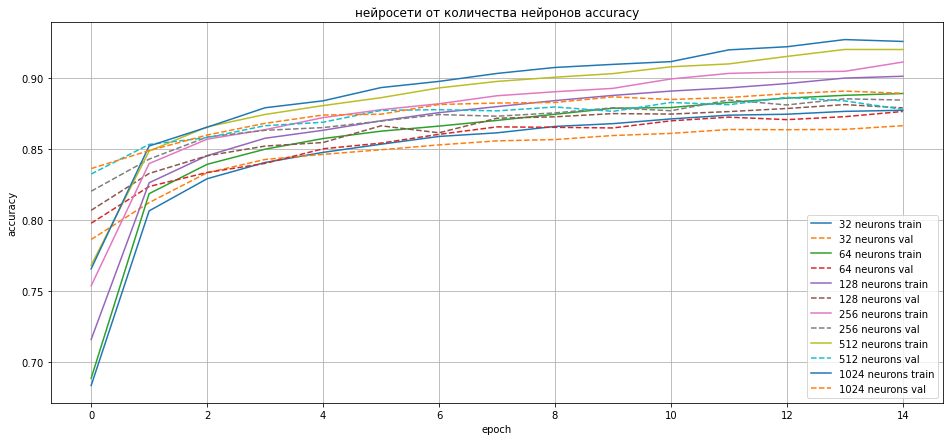

In [20]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

for n_neurons in [32, 64, 128, 256, 512, 1024]:

    modeli = Sequential([
                      Dense(n_neurons, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])

    modeli.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    # hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
    # hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # картинки
    # plt.plot(epoch,[hh0_tr[1]]+hh.history['accuracy'],'-',label = f'{n_neurons} neurons' +' train')
    # plt.plot(epoch,[hh0_val[1]]+hh.history['val_accuracy'],'--',label = f'{n_neurons} neurons' + ' val')
    plt.plot(epoch,hh.history['accuracy'],'-',label = f'{n_neurons} neurons' +' train')
    plt.plot(epoch,hh.history['val_accuracy'],'--',label = f'{n_neurons} neurons' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества нейронов accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Как видно, при 1024 нейронах метрика на валидационной выборке максимальна, и не имеет резких скачков по ходу обучения.

In [21]:
modeli.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              803840    
                                                                 
 dense_11 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [22]:
def evaluate_model(model):
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # проводим обучение модели 
    hh = model.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    print(model.summary())
    return hh.history['accuracy'], hh.history['val_accuracy']

Теперь исследуем сети с примерно одинаковым количеством весов, но с разным количеством слоев. Количество нейронов в слоях подбиралось в ручную.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 590)               463150    
                                                                 
 dense_15 (Dense)            (None, 570)               336870    
                                                                 
 dense_16 (Dense)    

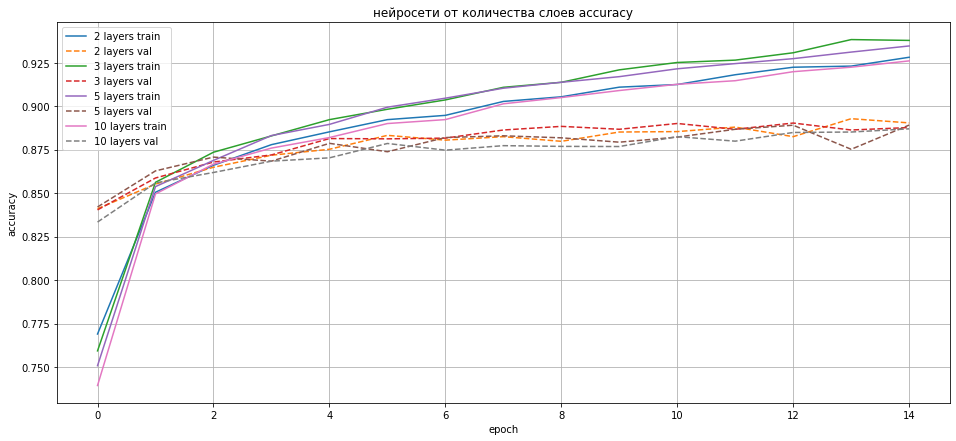

In [23]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

model2 = Sequential([
                      Dense(1024, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])

model3 = Sequential([
                      Dense(590, activation='relu', input_shape=(784,)),
                     Dense(570, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

model5 = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

model10 = Sequential([
                      Dense(290, activation='relu', input_shape=(784,)),
                     Dense(285, activation='tanh'),
                     Dense(280, activation='tanh'),
                     Dense(275, activation='tanh'),
                     Dense(270, activation='tanh'),
                     Dense(265, activation='tanh'),
                     Dense(260, activation='tanh'),
                     Dense(255, activation='tanh'),
                     Dense(250, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

map_dict = {0: 2, 1: 3, 2: 5, 3: 10}
for idx, model in enumerate([model2, model3, model5, model10]):
    metrics = evaluate_model(model)

    plt.plot(epoch,metrics[0],'-',label = f'{map_dict[idx]} layers' +' train')
    plt.plot(epoch,metrics[1],'--',label = f'{map_dict[idx]} layers' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества слоев accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Видно, что при одинаковом количестве весов результаты почти одинаковы, но все-таки большую метрику на валиде дает 5-ти слойная сеть.

Теперь попробуем 5-ти слойную сеть с разными оптимизаторами.

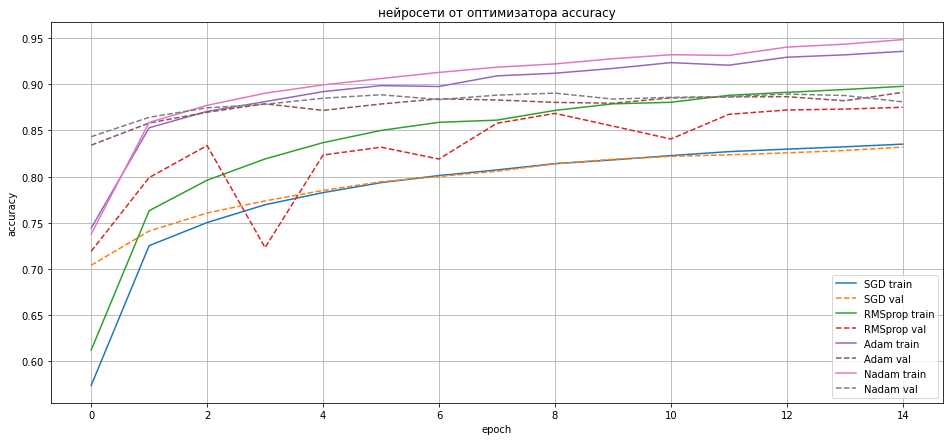

In [24]:
# создаем модель model
model = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    
    # проводим обучение модели 
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # картинки
    plt.plot(epoch,hh.history['accuracy'],'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,hh.history['val_accuracy'],'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Лучшую метрику для этой задачи дает оптимизатор Adam

Теперь создадим и обучим сеть с лучшими параметрами:

In [25]:
model = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

model.load_weights('model.h5')

model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

hh = model.fit(
            train_images,
            to_categorical(train_labelf),
            epochs=30,
            batch_size=1024, validation_split=0.2, verbose = 1
            )

Epoch 1/30
47/47 [==============================] - 6s 93ms/step - loss: 0.6931 - accuracy: 0.7503 - val_loss: 0.4590 - val_accuracy: 0.8325
Epoch 2/30
47/47 [==============================] - 4s 80ms/step - loss: 0.3985 - accuracy: 0.8564 - val_loss: 0.4275 - val_accuracy: 0.8474
Epoch 3/30
47/47 [==============================] - 4s 82ms/step - loss: 0.3564 - accuracy: 0.8692 - val_loss: 0.3891 - val_accuracy: 0.8529
Epoch 4/30
47/47 [==============================] - 4s 79ms/step - loss: 0.3222 - accuracy: 0.8815 - val_loss: 0.3525 - val_accuracy: 0.8733
Epoch 5/30
47/47 [==============================] - 4s 87ms/step - loss: 0.2972 - accuracy: 0.8896 - val_loss: 0.3522 - val_accuracy: 0.8717
Epoch 6/30
47/47 [==============================] - 4s 82ms/step - loss: 0.2771 - accuracy: 0.8960 - val_loss: 0.3299 - val_accuracy: 0.8845
Epoch 7/30
47/47 [==============================] - 4s 77ms/step - loss: 0.2547 - accuracy: 0.9070 - val_loss: 0.3209 - val_accuracy: 0.8859
Epoch 8/30
47

Вывод - качество классификации помогает улучшить выбор гиперпараметров - как самой архитектуры сети, так и выбор оптимизатора.

Получим из предикта целевые классы:

In [26]:
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred,axis=1)

313/313 [==============================] - 2s 5ms/step


Выведем по несколько картинок для каждого класса:

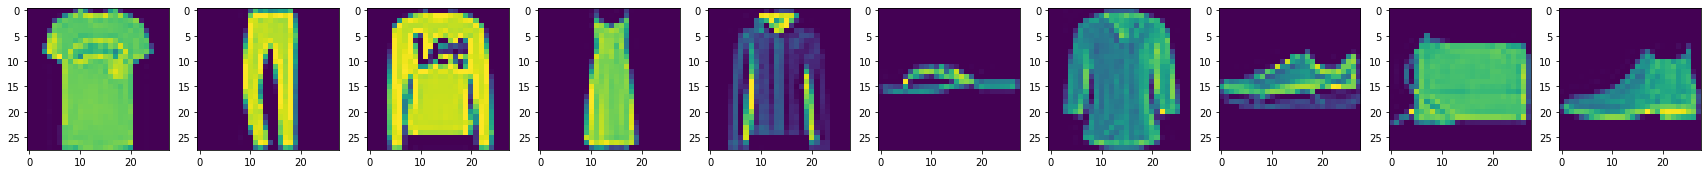

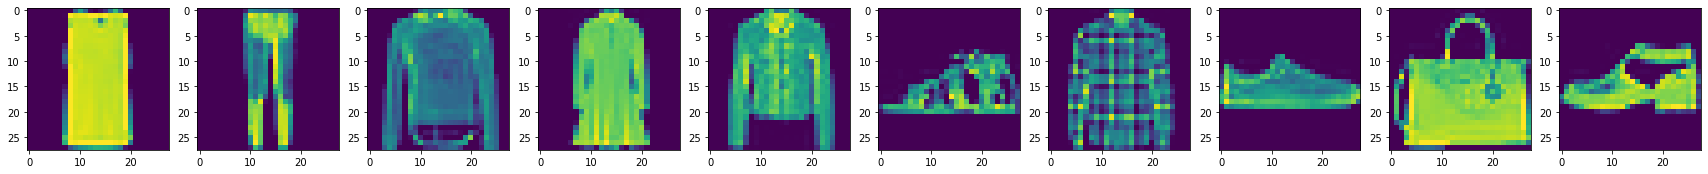

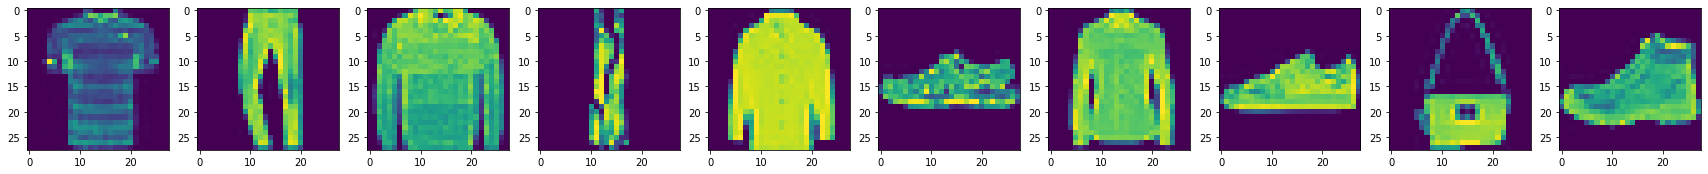

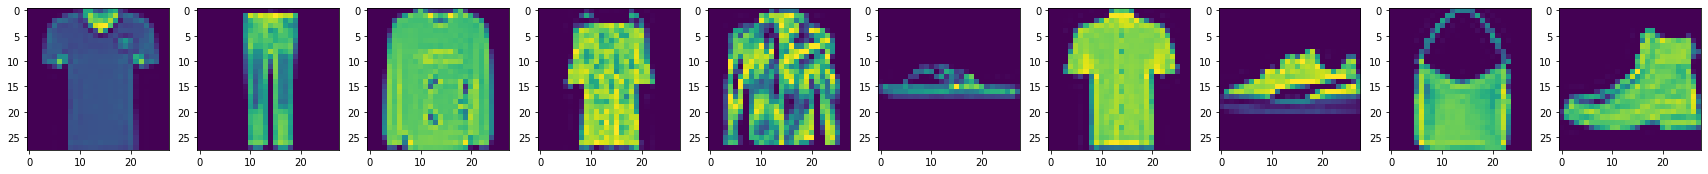

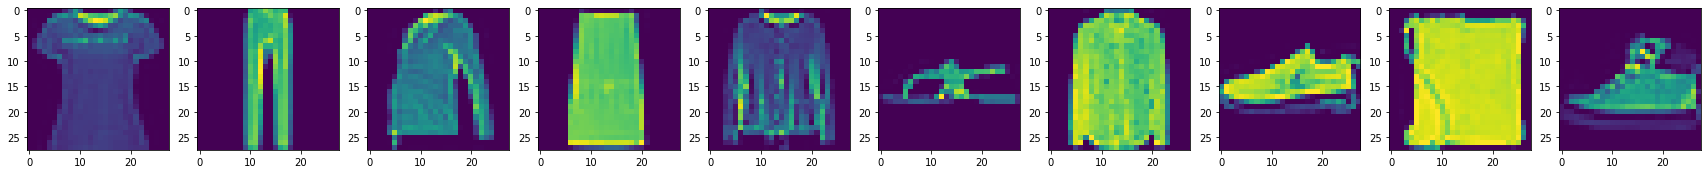

In [27]:
idx_list = []
for i in range(10):
    idx_list.append(np.where(test_labelf == i)[0])

for i in range(5):
    plt.figure(figsize =(30,25))
    for j in range(10):
        
        plt.subplot(i+1,10,j+1)
        plt.imshow(test_images[idx_list[j][i],:].reshape(28,28))
plt.show()

Видно, что категории одежды вполне узнаваемы

Теперь посмотрим матрицу ошибок по всем классам.

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


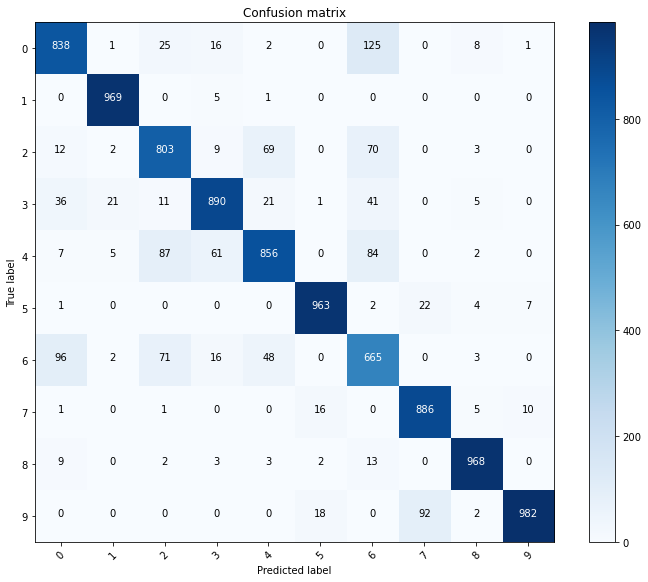

In [29]:
cnf_matrix = confusion_matrix(y_pred_class, test_labelf)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix')

Выводы по матрице ошибок:

Меньше всего ошибок у 1 категории (штаны) - их трудно спутать с чем то еще
Удивительно, но далее идет 9 категория сапоги/ботинки. Их можно спутать с категориями 5 (сандалии/шлепки/босоножки) и 7 (кеды). Собственно, те небольшие ошибки, которые есть у этих трех категорий, связаны с путаницей между собой.
На третьем месте 8 категория - сумки. Их также трудно спутать с чем то еще.
Далее идет много путаницы между собой у категорий 0, 2, 3, 4, 6. Это футболки, кофты, платья, рубашки. В целом, все довольно логично.

Теперь рассмотрим precision и recall для каждого класса:

In [30]:
print('TEST\n\n' + classification_report(test_labelf, y_pred_class))

TEST

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.80      0.82      1000
           3       0.87      0.89      0.88      1000
           4       0.78      0.86      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.74      0.67      0.70      1000
           7       0.96      0.89      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.90      0.98      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Выводы по отчету классификации:

Полнота и точность для каждого класса примерно равны. Это говорит о том, что ошибок первого и второго рода для каждого класса примерно одинаково. 